In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Get Mean MAE 
x = pd.read_csv("backtesting_results_BE_Europe BE_pfv_just_weights.csv", ",", decimal='.')
x = x.groupby(['class'])['mae'].mean()
x

# Visualize KMM results

In [5]:
baseline = pd.read_csv("../backtesting_results_BE_Europe BE_pfv_baseline_all_markets_no_weights.csv", ",", decimal='.')
baseline = baseline[baseline['class'] == "overall"]
baseline['prediction_date']= pd.to_datetime(baseline['prediction_date'], format="%Y-%m")
baseline = baseline.set_index('prediction_date')

iteration_1 = pd.read_csv("../backtesting_results_BE_Europe BE_pfv_kmm_just_one-market.csv", ",", decimal='.')
iteration_1 = iteration_1[iteration_1['class'] == "overall"]
iteration_1['prediction_date']= pd.to_datetime(iteration_1['prediction_date'], format="%Y-%m")
iteration_1 = iteration_1.set_index('prediction_date')

iteration_2 = pd.read_csv("../backtesting_results_BE_Europe BE_pfv_final_kmm_2017.csv", ",", decimal='.')
iteration_2 = iteration_2[iteration_2['class'] == "overall"]
iteration_2['prediction_date']= pd.to_datetime(iteration_2['prediction_date'], format="%Y-%m")
iteration_2 = iteration_2.set_index('prediction_date')

iteration_3 = pd.read_csv("../backtesting_results_BE_Europe BE_pfv_version2_0.csv", ",", decimal='.')
iteration_3 = iteration_3[iteration_3['class'] == "overall"]
iteration_3['prediction_date']= pd.to_datetime(iteration_3['prediction_date'], format="%Y-%m")
iteration_3 = iteration_3.set_index('prediction_date')

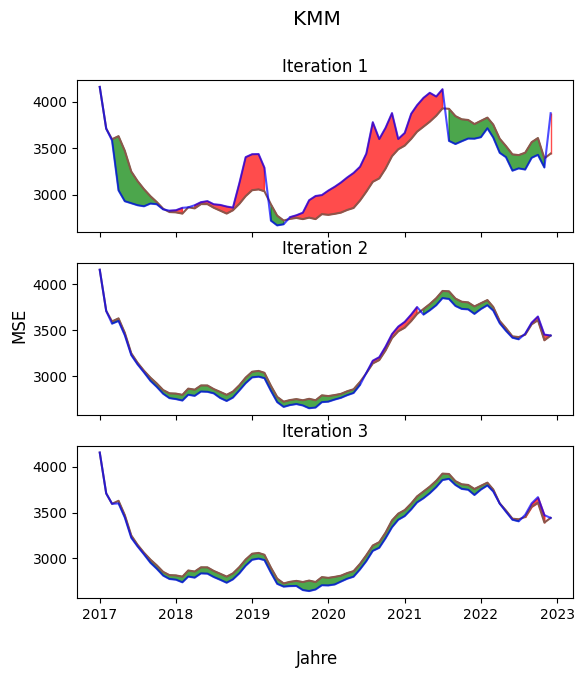

In [6]:

fig, axs = plt.subplots(3, 1)

axs[0].plot(baseline['mae'], color='tab:brown')
axs[0].plot(iteration_1['mae'], color='b', alpha=0.7)
axs[0].fill_between(baseline.index, baseline['mae'], iteration_1['mae'], where=(baseline['mae'] > iteration_1['mae']), color='g', alpha=0.7)
axs[0].fill_between(baseline.index, baseline['mae'], iteration_1['mae'], where=(baseline['mae'] < iteration_1['mae']), color='r', alpha=0.7)
axs[0].set_title("Iteration 1")

axs[1].plot(baseline['mae'], color='tab:brown')
axs[1].plot(iteration_2['mae'], color='b', alpha=0.7)
axs[1].fill_between(baseline.index, baseline['mae'], iteration_2['mae'], where=(baseline['mae'] > iteration_2['mae']), color='g', alpha=0.7)
axs[1].fill_between(baseline.index, baseline['mae'], iteration_2['mae'], where=(baseline['mae'] < iteration_2['mae']), color='r', alpha=0.7)
axs[1].set_title("Iteration 2")

axs[2].plot(baseline['mae'], color='tab:brown')
axs[2].plot(iteration_3['mae'], color='b', alpha=0.7)
axs[2].fill_between(baseline.index, baseline['mae'], iteration_3['mae'], where=(baseline['mae'] > iteration_3['mae']), color='g', alpha=0.7)
axs[2].fill_between(baseline.index, baseline['mae'], iteration_3['mae'], where=(baseline['mae'] < iteration_3['mae']), color='r', alpha=0.7)
axs[2].set_title("Iteration 3")


fig.supxlabel('Jahre')
fig.supylabel('MSE')
fig.set_figheight(7,5)

# shift subplots down:
st = fig.suptitle("KMM", fontsize="x-large")
st.set_y(0.95)
fig.subplots_adjust(top=0.85)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# Visualize TrAdaBoost results

In [7]:
baseline = pd.read_csv("../backtesting_results_BE_Europe BE_pfv_baseline_all_markets_no_weights.csv", ",", decimal='.')
baseline = baseline[baseline['class'] == "overall"]
baseline['prediction_date']= pd.to_datetime(baseline['prediction_date'], format="%Y-%m")
baseline = baseline.set_index('prediction_date')

iteration_1 = pd.read_csv("../backtesting_results_BE_Europe BE_pfv_kmm_just_one-market.csv", ",", decimal='.')
iteration_1 = iteration_1[iteration_1['class'] == "overall"]
iteration_1['prediction_date']= pd.to_datetime(iteration_1['prediction_date'], format="%Y-%m")
iteration_1 = iteration_1.set_index('prediction_date')

iteration_2 = pd.read_csv("../backtesting_results_BE_Europe BE_pfv_final_kmm_2017.csv", ",", decimal='.')
iteration_2 = iteration_2[iteration_2['class'] == "overall"]
iteration_2['prediction_date']= pd.to_datetime(iteration_2['prediction_date'], format="%Y-%m")
iteration_2 = iteration_2.set_index('prediction_date')

iteration_3 = pd.read_csv("../backtesting_results_BE_Europe BE_pfv_version2_0.csv", ",", decimal='.')
iteration_3 = iteration_3[iteration_3['class'] == "overall"]
iteration_3['prediction_date']= pd.to_datetime(iteration_3['prediction_date'], format="%Y-%m")
iteration_3 = iteration_3.set_index('prediction_date')

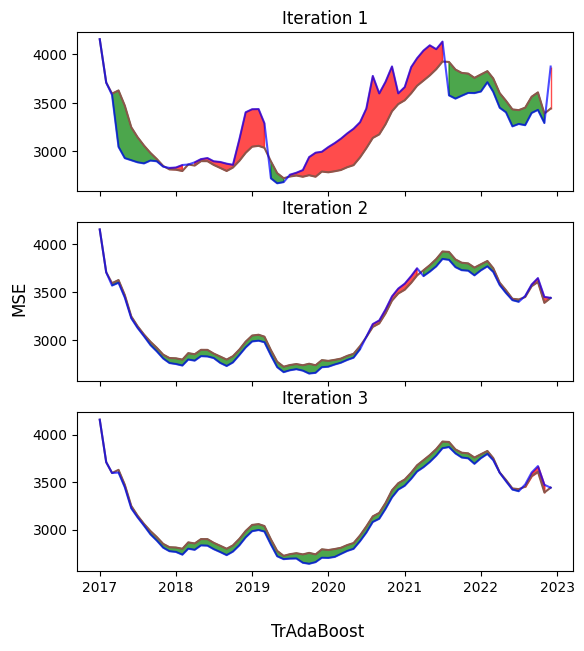

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1)

axs[0].plot(baseline['mae'], color='tab:brown')
axs[0].plot(iteration_1['mae'], color='b', alpha=0.7)
axs[0].fill_between(baseline.index, baseline['mae'], iteration_1['mae'], where=(baseline['mae'] > iteration_1['mae']), color='g', alpha=0.7)
axs[0].fill_between(baseline.index, baseline['mae'], iteration_1['mae'], where=(baseline['mae'] < iteration_1['mae']), color='r', alpha=0.7)
axs[0].set_title("Iteration 1")

axs[1].plot(baseline['mae'], color='tab:brown')
axs[1].plot(iteration_2['mae'], color='b', alpha=0.7)
axs[1].fill_between(baseline.index, baseline['mae'], iteration_2['mae'], where=(baseline['mae'] > iteration_2['mae']), color='g', alpha=0.7)
axs[1].fill_between(baseline.index, baseline['mae'], iteration_2['mae'], where=(baseline['mae'] < iteration_2['mae']), color='r', alpha=0.7)
axs[1].set_title("Iteration 2")

axs[2].plot(baseline['mae'], color='tab:brown')
axs[2].plot(iteration_3['mae'], color='b', alpha=0.7)
axs[2].fill_between(baseline.index, baseline['mae'], iteration_3['mae'], where=(baseline['mae'] > iteration_3['mae']), color='g', alpha=0.7)
axs[2].fill_between(baseline.index, baseline['mae'], iteration_3['mae'], where=(baseline['mae'] < iteration_3['mae']), color='r', alpha=0.7)
axs[2].set_title("Iteration 3")


fig.supxlabel('TrAdaBoost')
fig.supylabel('MSE')
fig.set_figheight(7,5) 

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()